In [55]:
# Calculating the Yield to Maturity (YTM) of a Bond 

from scipy.optimize import newton 

def bond_ytm(price, face_value, coupon_rate, years_to_maturity, frequency=1):
    # Calculate coupon payment per period 
    coupon_payment = (coupon_rate * face_value) / frequency 
    total_periods = years_to_maturity * frequency 
    
    # Define the bond price function
    def price_function(ytm):
        return sum(coupon_payment / (1 + ytm / frequency) ** t for t in range(1, total_periods + 1)) + \
               face_value / (1 + ytm / frequency) ** total_periods - price 

    # Initial guess for YTM 
    initial_guess = coupon_rate 

    # Solve for YTM using Newton-Raphson method
    ytm = newton(price_function, initial_guess)

    # Return the calculated YTM
    return ytm

# Input values
bond_price = 100  # Market price 
face_value = 100  # Face value 
coupon_rate = 0.06  # % annual coupon rate 
years_to_maturity = 10  # 10 years to maturity 

# Calculate the YTM
ytm = bond_ytm(bond_price, face_value, coupon_rate, years_to_maturity)
print(f"Yield to Maturity: {ytm:.2%}")


Yield to Maturity: 7.00%


In [15]:
# Bond Pricing 

def bond_price(face_value, coupon_rate, years_to_maturity, ytm, frequency=2):
    # Coupon per period 
    coupon_payment = (coupon_rate * face_value) / frequency 
    total_periods = years_to_maturity * frequency 
    discount_rate = ytm / frequency 
    
    # Calculate present value of coupon payments 
    pv_coupons = sum(coupon_payment / (1 + discount_rate) ** t for t in range(1, total_periods + 1))

    # Calculate present value of face value 
    pv_face_value = face_value / (1 + discount_rate) ** total_periods

    # Bond price is the sum of PV of coupons and PV of face value 
    price = pv_coupons + pv_face_value 

    return price 

# Input values 
face_value = 100
coupon_rate = 0.06  # Fixed the variable name (no space)
years_to_maturity = 10 
ytm = 0.06

# Calculate the bond price
price = bond_price(face_value, coupon_rate, years_to_maturity, ytm)
print(f"Bond Price: ${price:.2f}")


Bond Price: $100.00


In [17]:
# Yield Curve Analysis 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

# Load dataset
data = pd.read_csv(r"/Users/YJDah/Desktop/daily-treasury-rates.csv")

# Ensure Date Column is in datetime format 
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the 10Y - 3M Yield Spread
data['10Y-3M Spread'] = data['10Y_yield'] - data['3M_yield']

# Plot the 10-year minus 3-month yield spread
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['10Y-3M Spread'], marker='o', linestyle='-', color='green', alpha=0.7)
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("10-Year Minus 3-Month Yield Spread")
plt.xlabel("Date")
plt.ylabel("Yield Spread (%)")
plt.grid()
plt.show()


KeyError: '10Y_yield'

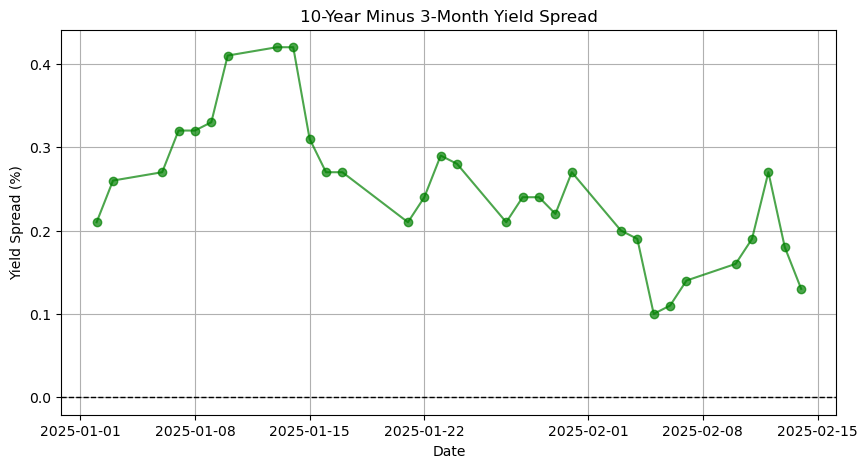

C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


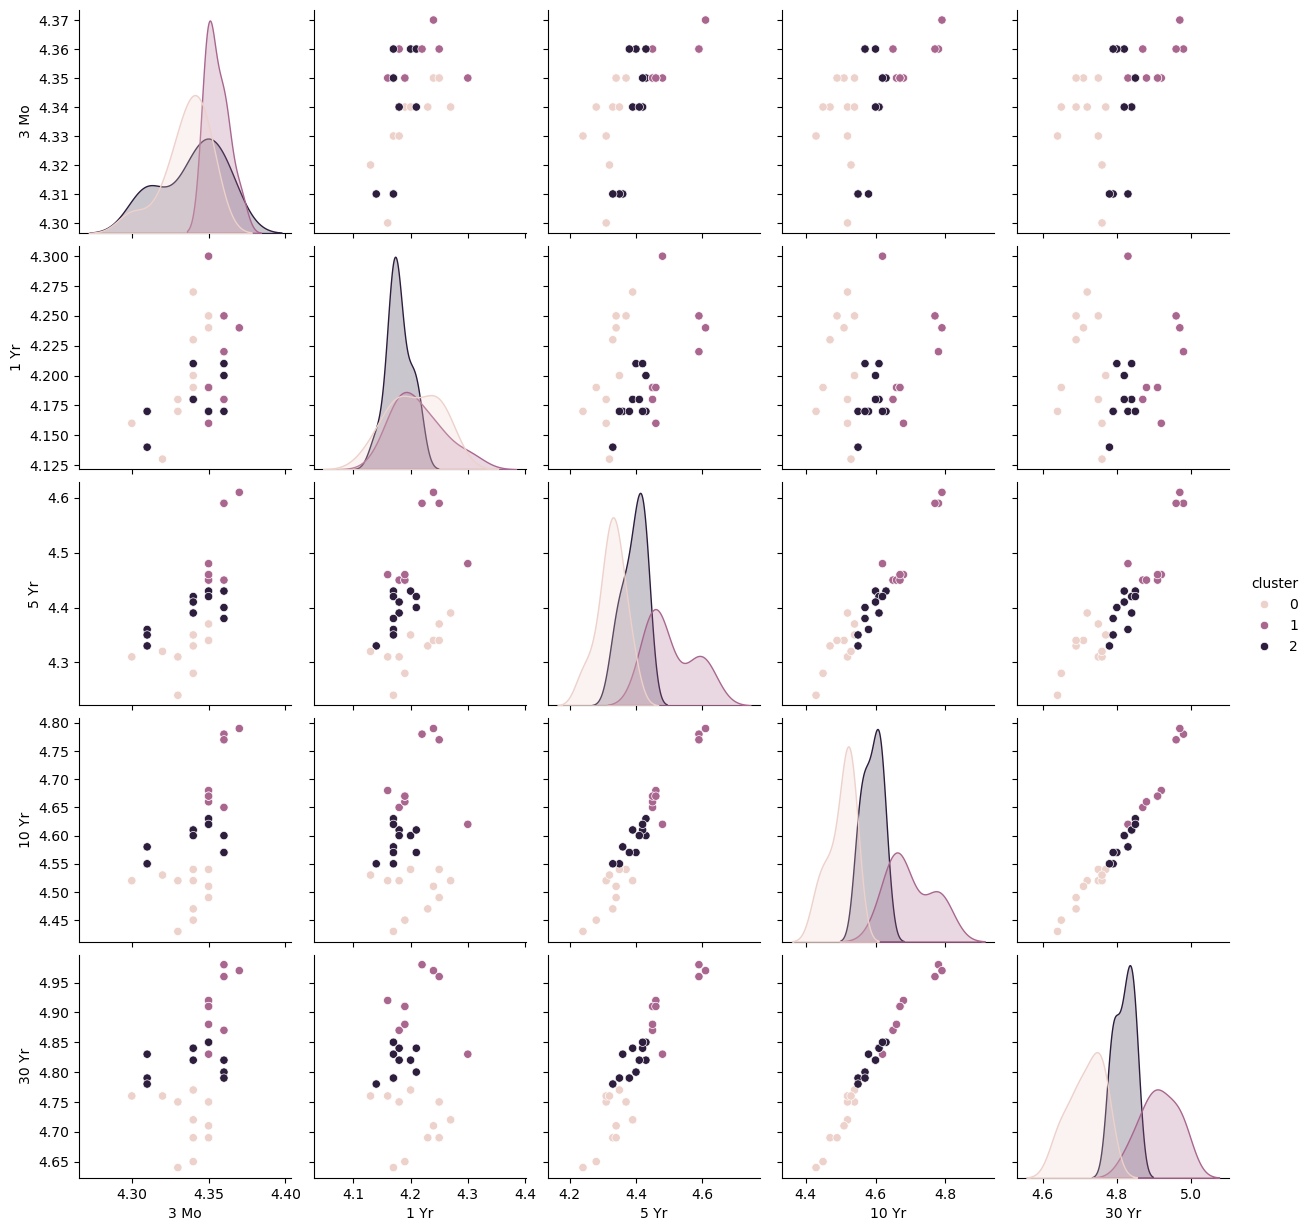

In [27]:
# Yield Curve Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv(r"/Users/YJDah/Desktop/daily-treasury-rates.csv")

# Ensure Date Column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the 10Y - 3M Yield Spread
data['10Y-3M Spread'] = data['10 Yr'] - data['3 Mo']

# Plot the 10-year minus 3-month yield spread
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['10Y-3M Spread'], marker='o', linestyle='-', color='green', alpha=0.7)
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("10-Year Minus 3-Month Yield Spread")
plt.xlabel("Date")
plt.ylabel("Yield Spread (%)")
plt.grid()
plt.show()

#Select yield columns
yields = data[['3 Mo', '1 Yr', '5 Yr', '10 Yr', '30 Yr']]

#Perform K-means clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(yields)

#Visualize clusters 
sns.pairplot(data, hue='cluster', vars=['3 Mo', '1 Yr', '5 Yr', '10 Yr', '30 Yr'])
plt.show()



In [27]:
# Predicting COrporate Bond default 
#Altman Z score 

def altman_z_score(working_capital, total_assets, retained_earnings, ebit, market_value_equity, total_liabilities, sales):

    X1 = working_capital / total_assets
    X2 = retained_earnings /total_assets
    X3 = ebit / total_assets 
    X4 = market_value_equity /total_liabilities 
    X5 = sales / total_assets 


    #Altman Z-score formula 
    Z = 1.2 * X1 + 1.4 * X2 + 3.3 * X3 + 0.6 * X4 + 1.0 * X5

    # Interpretation 
    if Z > 2.99:
        risk = "Low Risk (Safe)"
    elif 1.81 < Z <= 2.99:
        risk = "Moderate Risk (gray Area)"
    else:
        risk = "High Risk (Distress Zone)"

    return Z, risk

#  MagnaChip Semiconductor Corporation (MX)
Z, risk_level = altman_z_score(working_capital=215000000, total_assets=940000000,
                              retained_earnings=-105000000, ebit=-127000000,
                              market_value_equity=410000000,
                              total_liabilities=973000000, sales=760000000)
print(f"Altman Z-score: {Z:.2f}, Risk Level: {risk_level}")


Altman Z-score: 0.73, Risk Level: High Risk (Distress Zone)


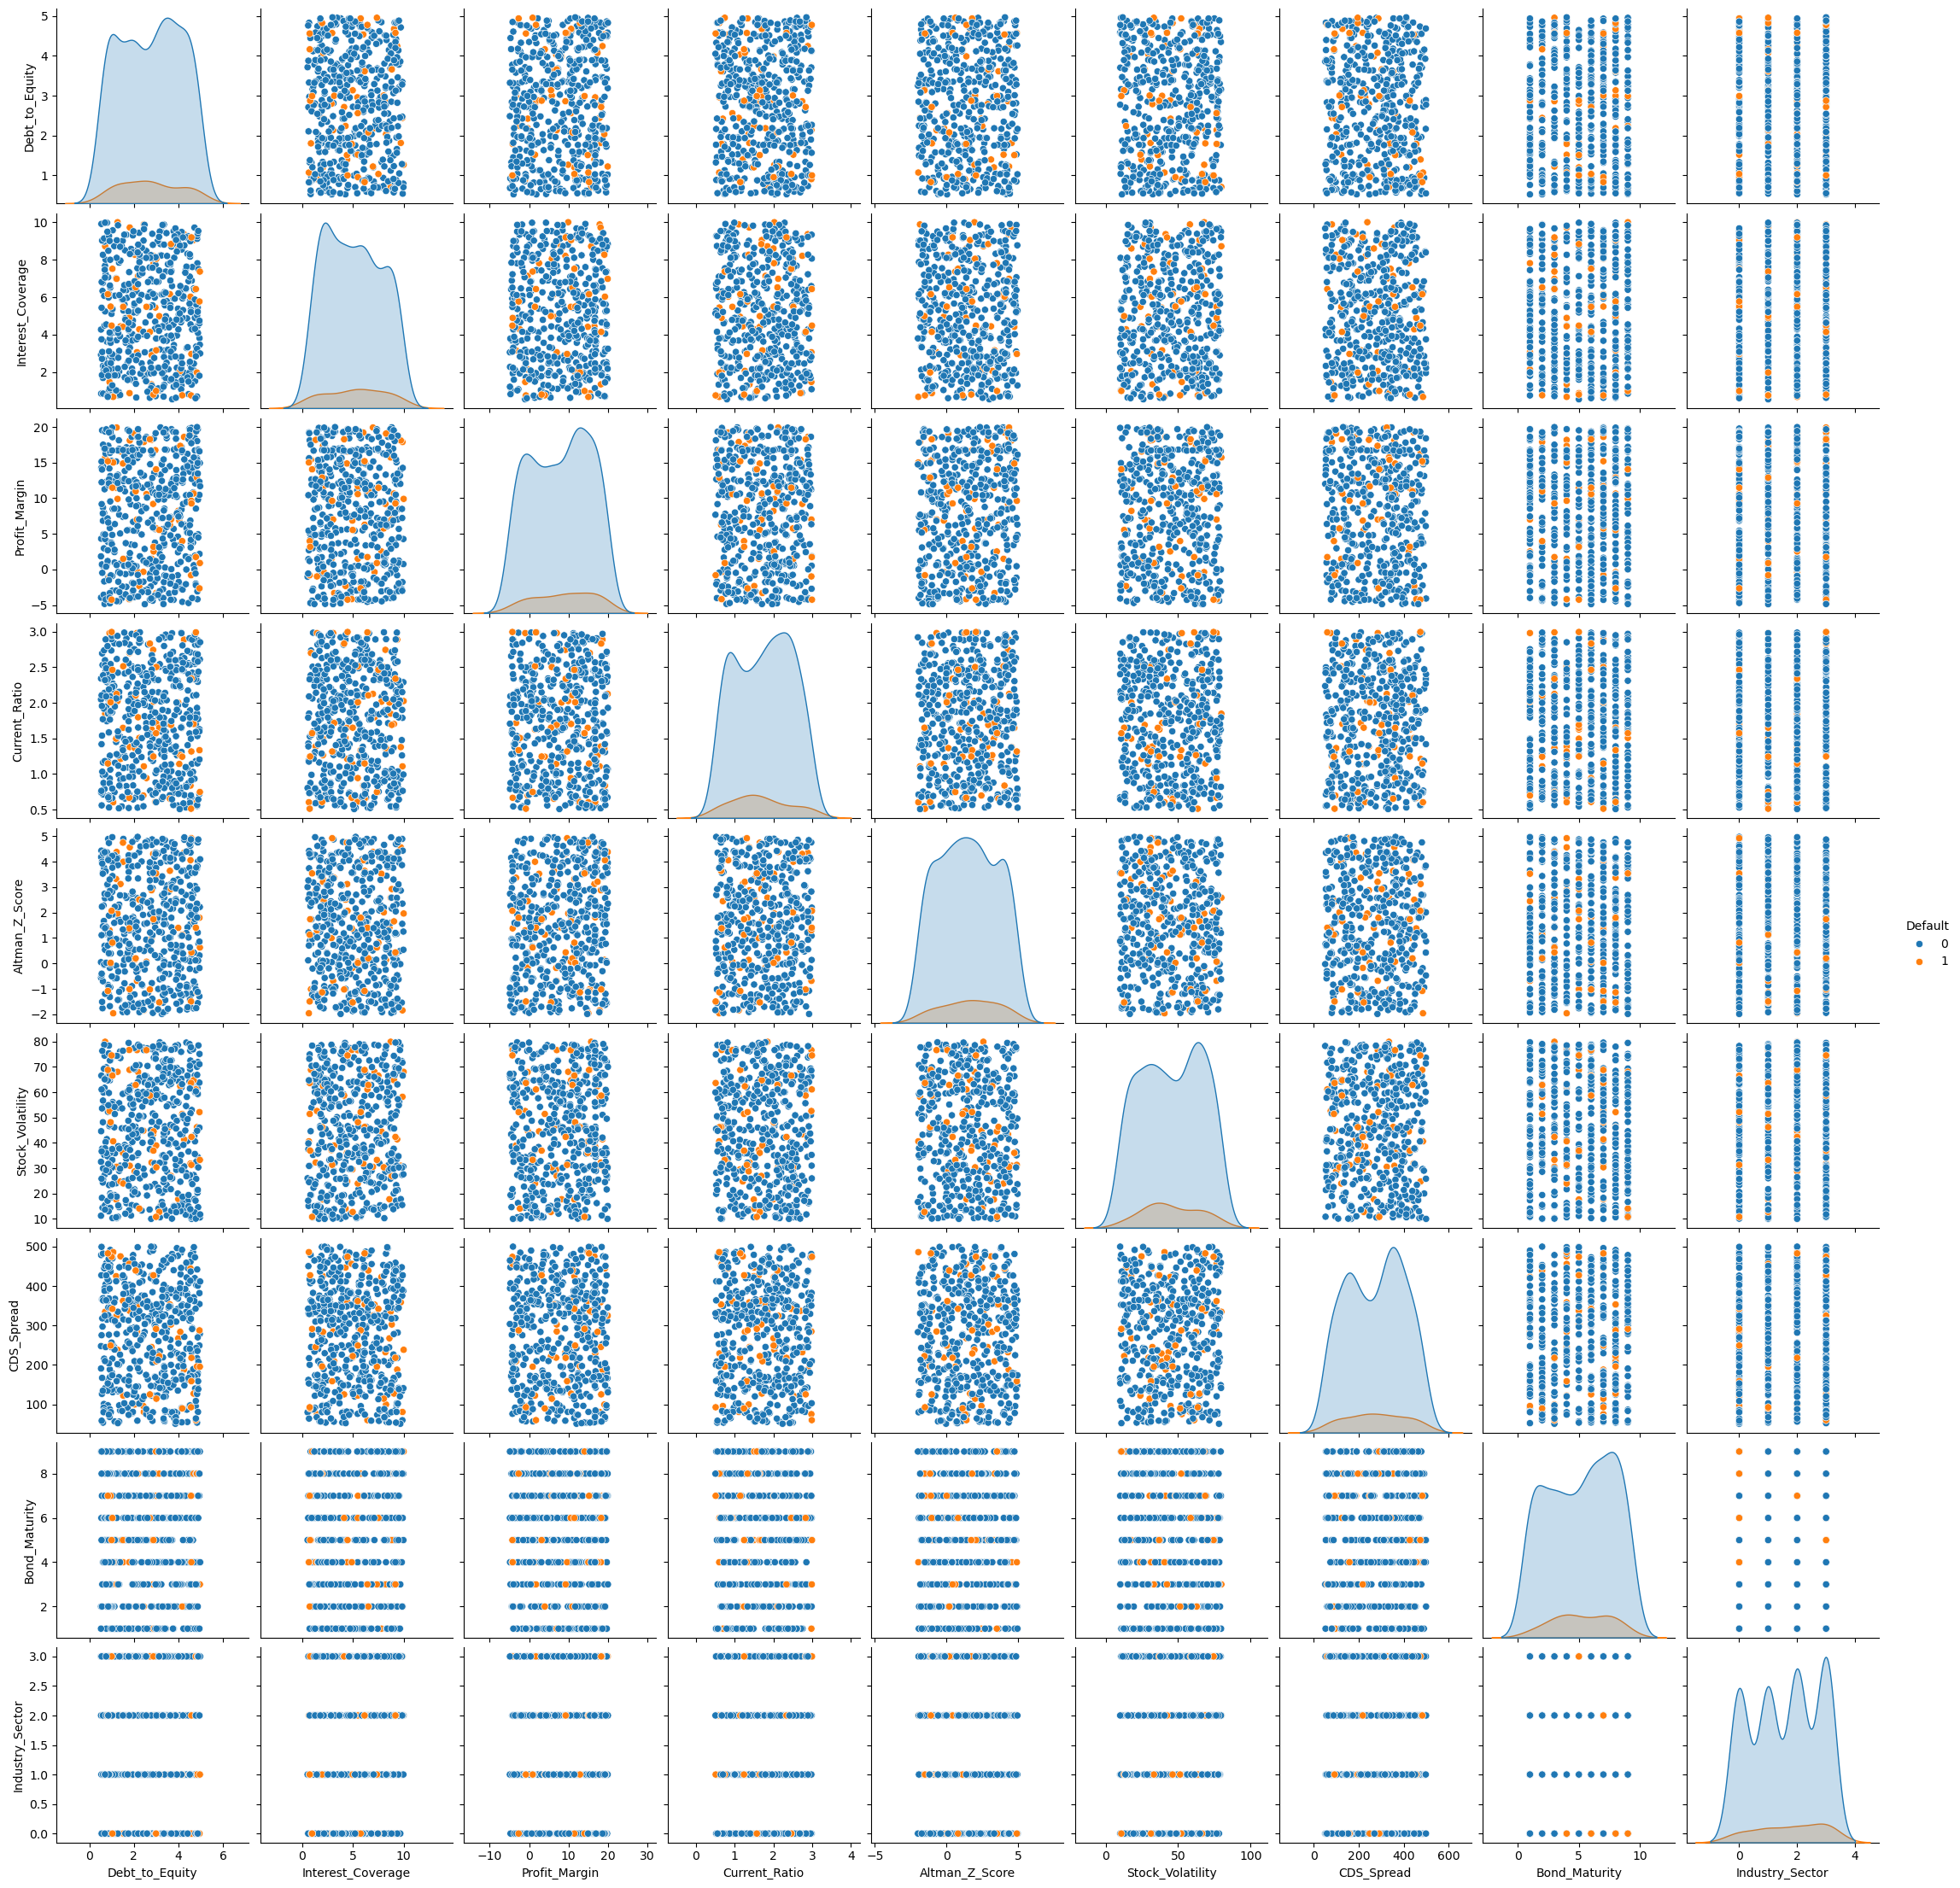

Model Accuracy: 89.00%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        89
           1       0.00      0.00      0.00        11

    accuracy                           0.89       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.79      0.89      0.84       100

Predicted Default Probabability: 12.67%


C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YJDah\anaconda3\Lib\site-packag

In [49]:
#Predicting corporate Bond default
#Using Binary Logistic Regresson to predict the probability of a default

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report 

#SImulation Corporate bond data (replace with real company financial data)
np.random.seed(42)
data= pd.DataFrame({
    'Debt_to_Equity': np.random.uniform(0.5, 5, 500), # HIgh D/E = high leverage risk 
    'Interest_Coverage': np.random.uniform(0.5, 10, 500),
    'Profit_Margin': np.random.uniform(-5, 20, 500),
    'Current_Ratio': np.random.uniform(0.5, 3, 500),
    'Altman_Z_Score': np.random.uniform(-2, 5, 500),
    'Stock_Volatility': np.random.uniform(10, 80, 500),
    'CDS_Spread': np.random.uniform(50, 500, 500),
    'Bond_Maturity': np.random.randint(1, 10, 500),
    'Industry_Sector': np.random.choice([0, 1, 2, 3], 500),
    'Default': np.random.choice([0, 1], size=500, p=[0.90, 0.10])
})

#Exploratory Dat Analysis
sns.pairplot(data, hue="Default")
plt.show()

#Features and Target 
X = data.drop(columns=['Default'])
y= data['Default']

#Split into Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize Features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train Logistic Regression MOdel
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict Default Probabilities 
y_pred = model.predict(X_test) 

#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


#Predict probability of Default for a new Corporate Bond
new_bond = np.array([[4.0, 1.5, 5, 1.2, 1.5, 50, 300, 5, 2]]) #example bond 
new_bond_scaled = scaler.transform(new_bond)
default_probability = model.predict_proba(new_bond_scaled)[0][1]

print(f"Predicted Default Probabability: {default_probability:.2%}")

        

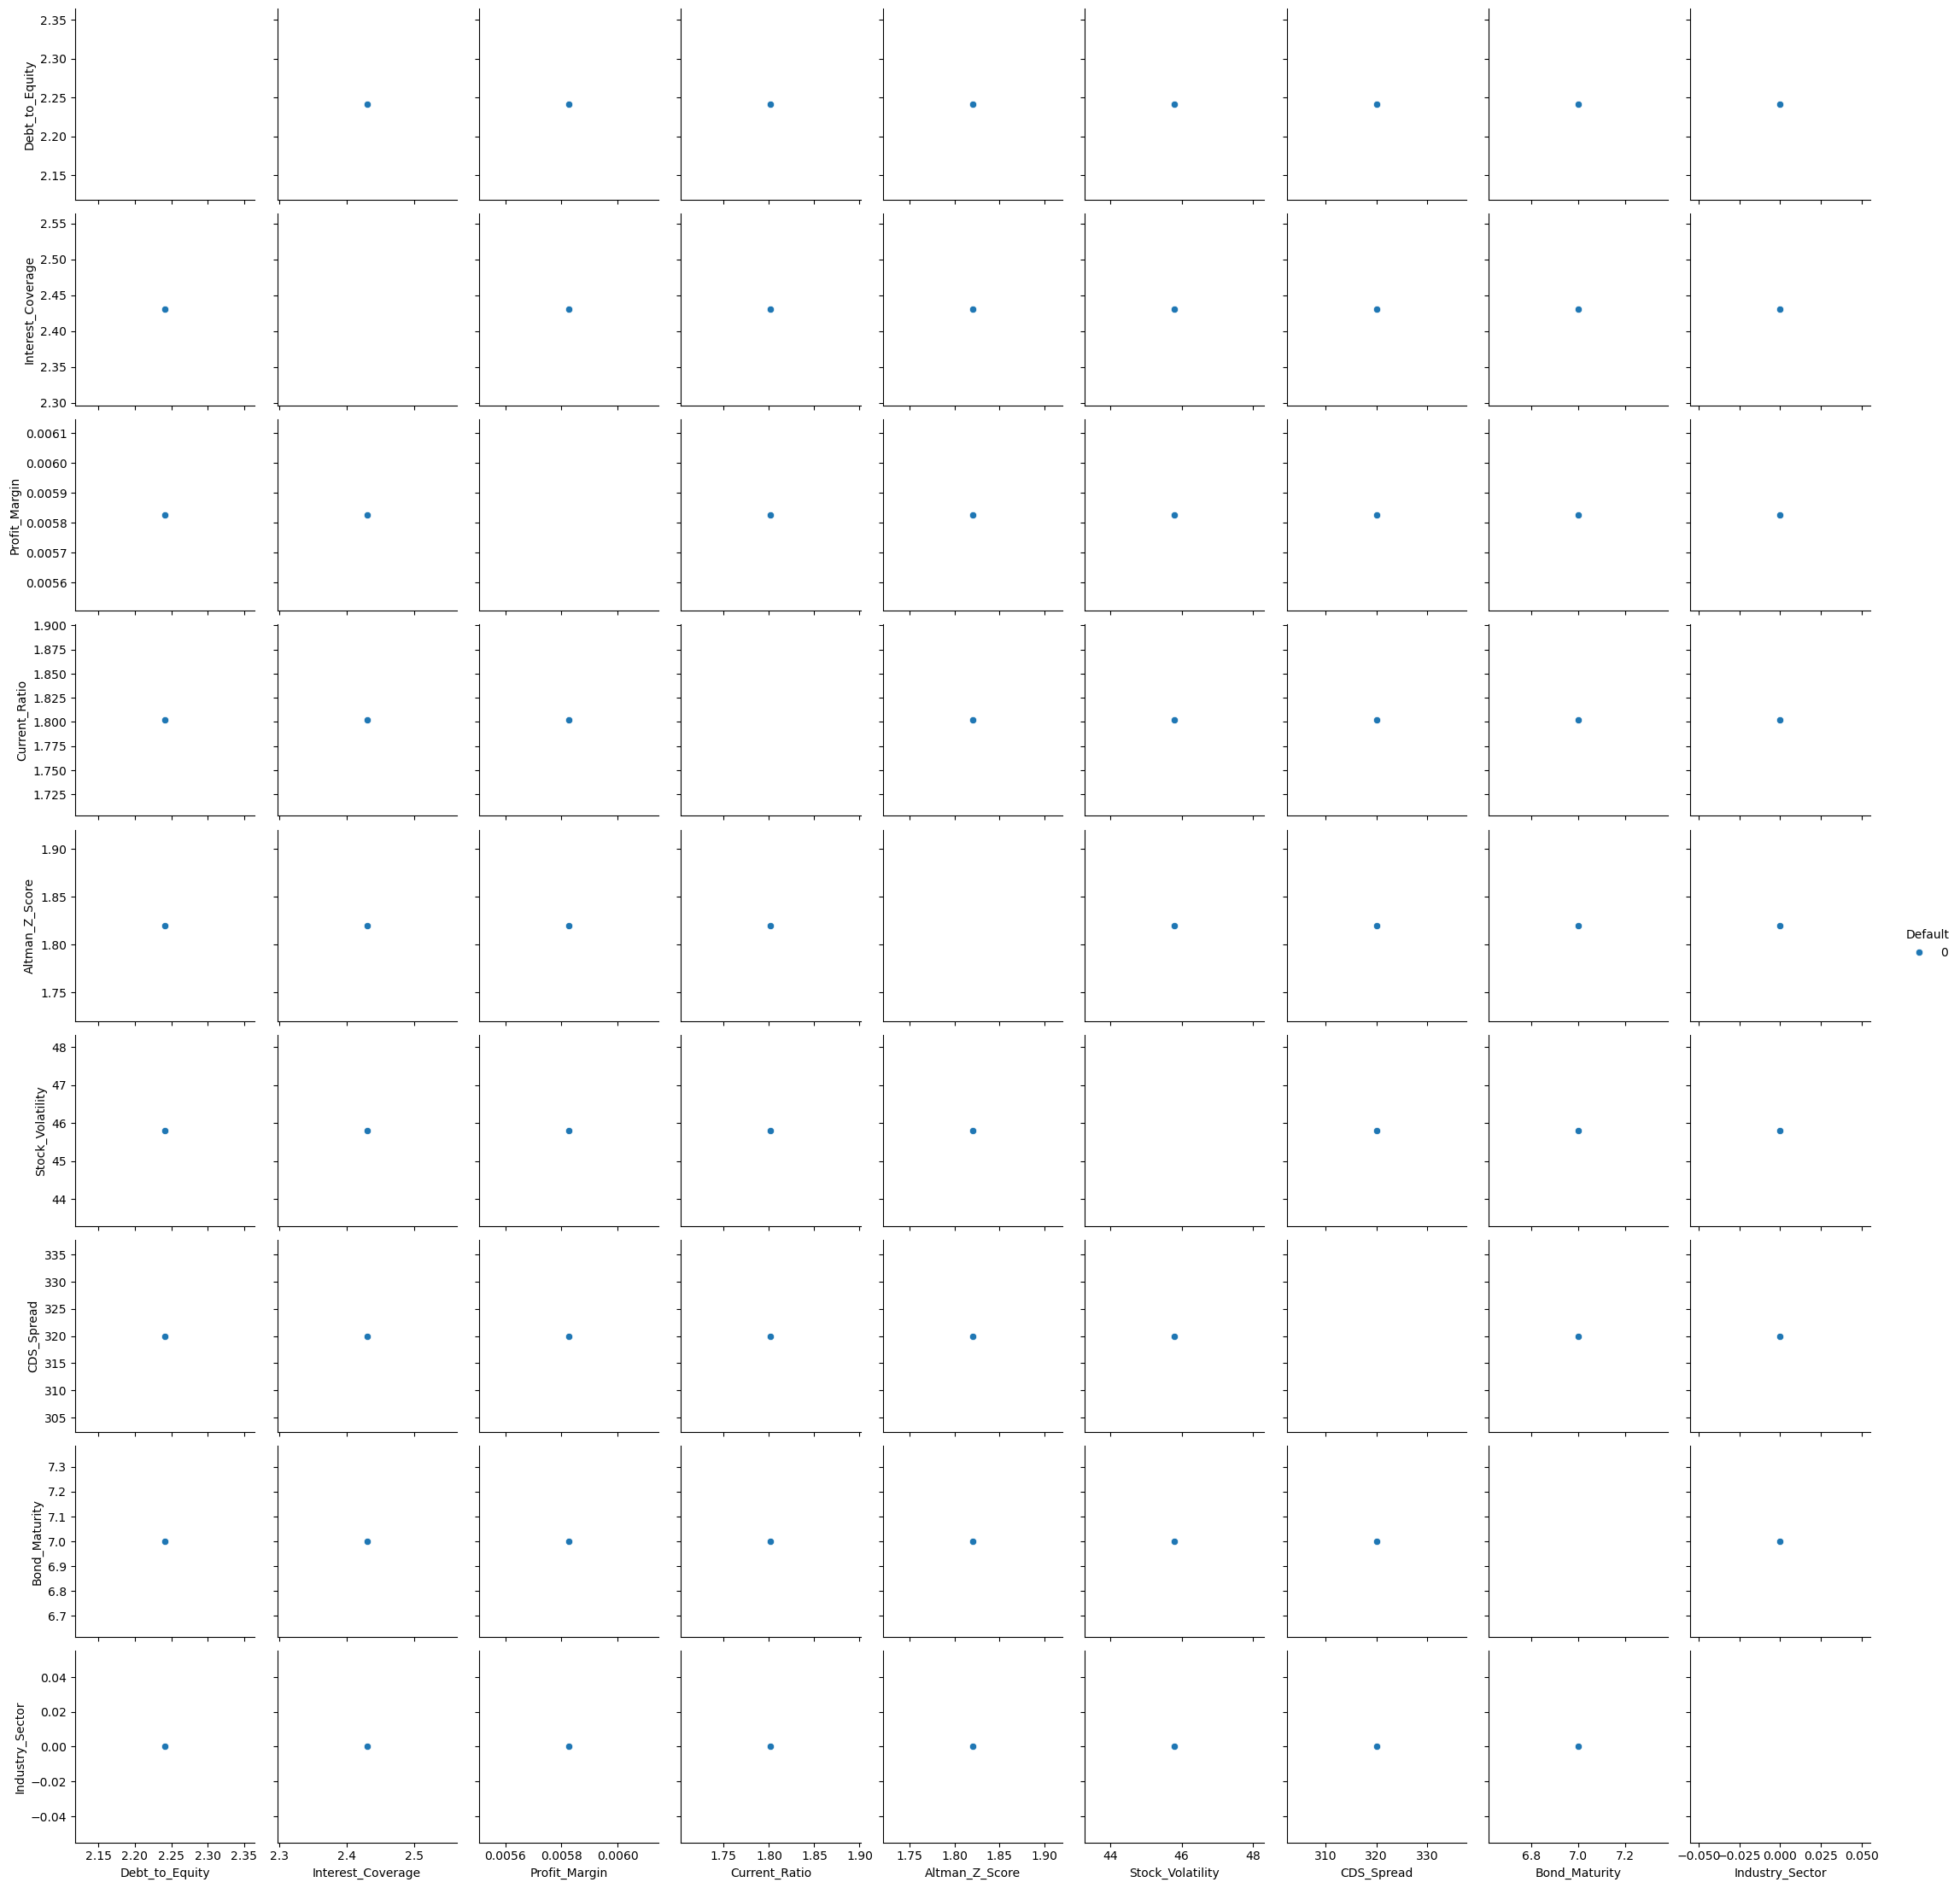

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [31]:
#Predicting corporate Bond default
#Using Binary Logistic Regresson to predict the probability of a default
#For United States Steel (X)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report 

#SImulation Corporate bond data (replace with real company financial data)
np.random.seed(42)
data = pd.DataFrame({
    'Debt_to_Equity': [2.24137931],
    'Interest_Coverage': [2.43],
    'Profit_Margin': [0.005826241],
    'Current_Ratio': [1.801905296],
    'Altman_Z_Score': [1.82],
    'Stock_Volatility': [45.8],
    'CDS_Spread': [320],
    'Bond_Maturity': [7],
    'Industry_Sector': [0],  # Basic Industries
    'Default': [0]
})

#Exploratory Dat Analysis
sns.pairplot(data, hue="Default")
plt.show()

#Features and Target 
X = data.drop(columns=['Default'])
y= data['Default']

#Split into Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize Features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train Logistic Regression MOdel
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict Default Probabilities 
y_pred = model.predict(X_test) 

#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))


#Predict probability of Default for a new Corporate Bond
new_bond = np.array([[4.0, 1.5, 5, 1.2, 1.5, 50, 300, 5, 2]]) #example bond 
new_bond_scaled = scaler.transform(new_bond)
default_probability = model.predict_proba(new_bond_scaled)[0][1]

print(f"Predicted Default Probabability: {default_probability:.2%}")

        

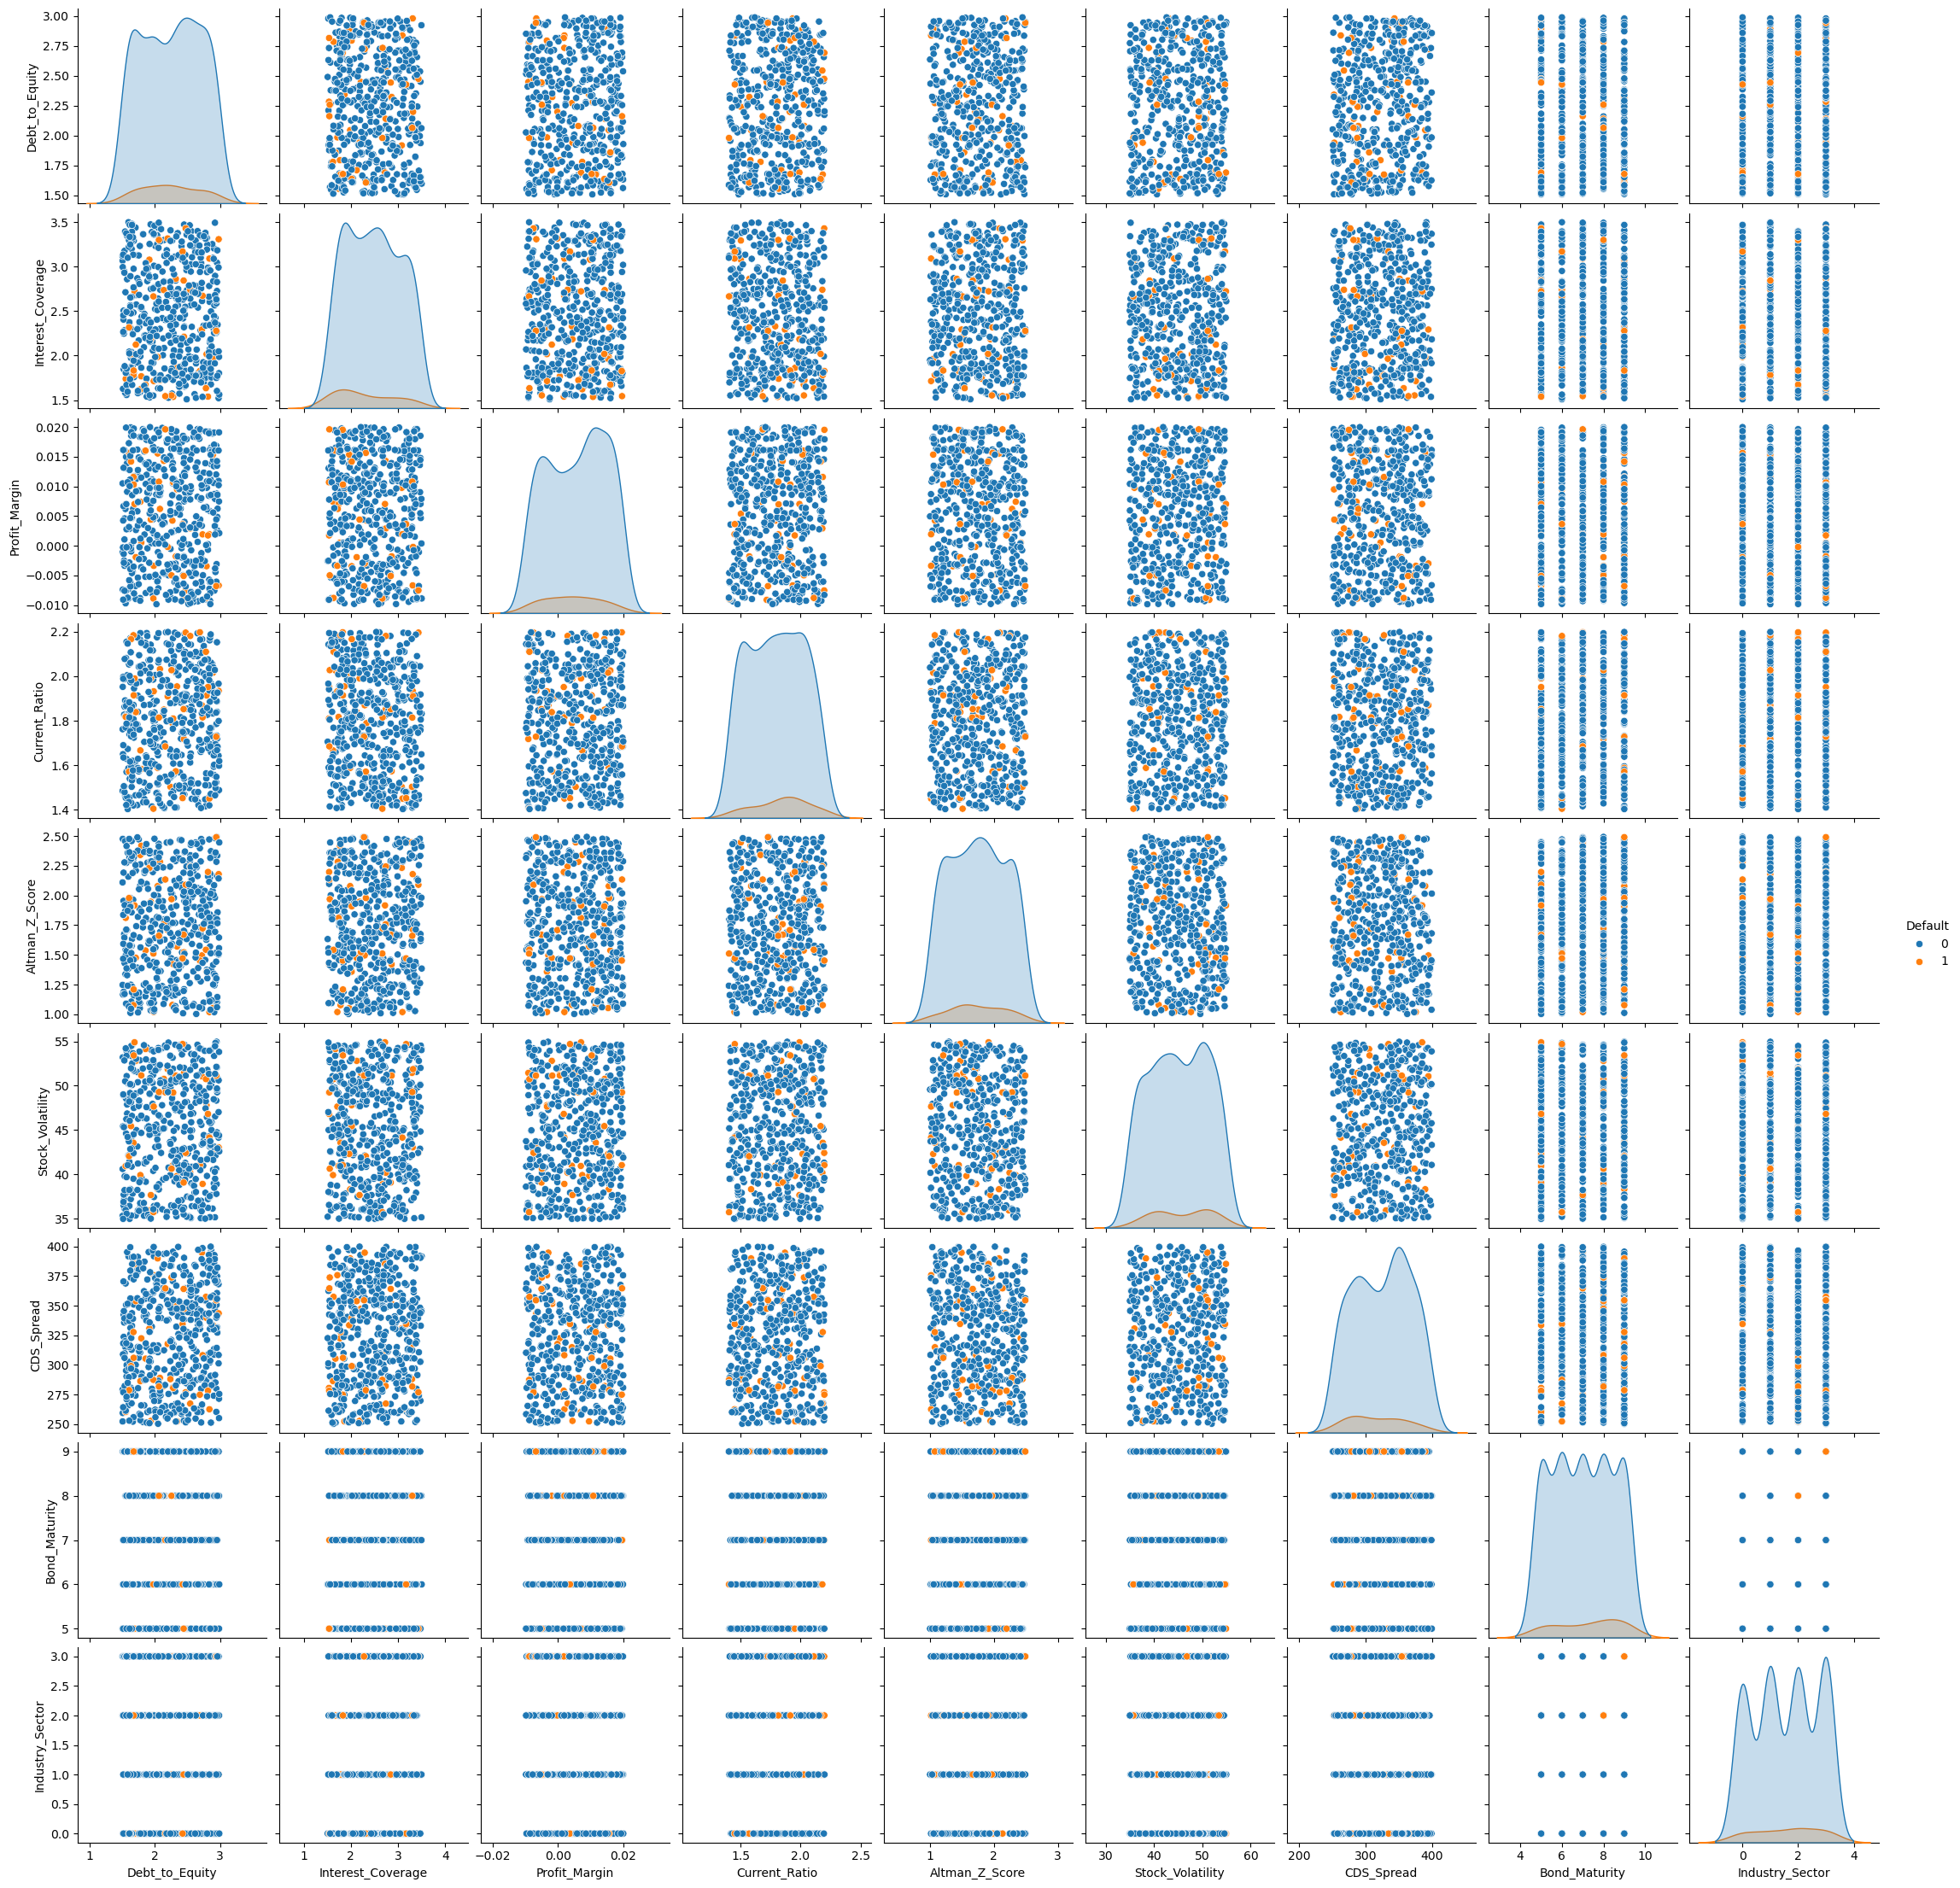

Model Accuracy: 93.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        93
           1       0.00      0.00      0.00         7

    accuracy                           0.93       100
   macro avg       0.47      0.50      0.48       100
weighted avg       0.86      0.93      0.90       100


Predicted Default Probability for US Steel: 6.57%

Feature Importance:
             Feature  Importance
1  Interest_Coverage    0.259607
6         CDS_Spread    0.233291
2      Profit_Margin    0.185225
8    Industry_Sector    0.178417
5   Stock_Volatility    0.121553
7      Bond_Maturity    0.104200
3      Current_Ratio    0.102417
0     Debt_to_Equity    0.039640
4     Altman_Z_Score    0.029971


C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YJDah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
#Predicting corporate Bond default, united states steel (x)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report 

# Generate synthetic data similar to US Steel's characteristics
np.random.seed(42)
n_samples = 500

# Create synthetic dataset with US Steel's data point included
data = pd.DataFrame({
    'Debt_to_Equity': np.append(np.random.uniform(1.5, 3.0, n_samples-1), 2.24137931),    #real - from CSV
    'Interest_Coverage': np.append(np.random.uniform(1.5, 3.5, n_samples-1), 2.43),        #estimated - calculated from operating margins
    'Profit_Margin': np.append(np.random.uniform(-0.01, 0.02, n_samples-1), 0.005826241),  #real - from CSV
    'Current_Ratio': np.append(np.random.uniform(1.4, 2.2, n_samples-1), 1.801905296),     #real - from CSV
    'Altman_Z_Score': np.append(np.random.uniform(1.0, 2.5, n_samples-1), 2.05),           #real - provided Z-score
    'Stock_Volatility': np.append(np.random.uniform(35, 55, n_samples-1), 45.8),           #estimated - from market data
    'CDS_Spread': np.append(np.random.uniform(250, 400, n_samples-1), 320),                #estimated - based on BB rating
    'Bond_Maturity': np.append(np.random.randint(5, 10, n_samples-1), 7),                  #estimated - typical maturity
    'Industry_Sector': np.append(np.random.choice([0, 1, 2, 3], n_samples-1), 0),          #real - Basic Industries from CSV
    'Default': np.append(np.random.choice([0, 1], size=n_samples-1, p=[0.90, 0.10]), 0)    #estimated - based on rating
})

#Exploratory Data Analysis
sns.pairplot(data, hue="Default")
plt.show()

#Features and Target 
X = data.drop(columns=['Default'])
y = data['Default']

#Split into Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize Features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict Default Probabilities 
y_pred = model.predict(X_test_scaled)

#Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get US Steel's data point and predict its default probability
us_steel_data = data.iloc[-1:].drop(columns=['Default'])
us_steel_scaled = scaler.transform(us_steel_data)
default_probability = model.predict_proba(us_steel_scaled)[0][1]
print(f"\nPredicted Default Probability for US Steel: {default_probability:.2%}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Importance', ascending=False))

        